# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [42]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [60]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf
import seaborn as sns

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.
1. Economic Networks
    - Node(s): individuals, firms, governments, financial institutions etc.
    - Link(s): purchases, sales, transactions, loans.
2. Railroad Networks
    - Node(s): railroad stations
    - Link(s): railroad tracks
3. Friendship Network
    - Node(s): Individuals
    - Link(s): Friendships

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Related to the current situation with Covid-19, network science could help us understand how the virus spreads, and further help measure the effects different iniatives (such as social distancing) have in reducing the spread. This could be crucial, should the world face another pandemic in future years.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

- An example could be the facebook-friendship network. Each individual have on average a relatively high number of friends, i.e. links (apparently 338, https://www.brandwatch.com/blog/facebook-statistics/). However, compared to the approximately 2.4 billion users (and 2.4 billion - 1 potential links), the Network can be considered sparse.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[1, 2, 3, 4, 5]
[(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]


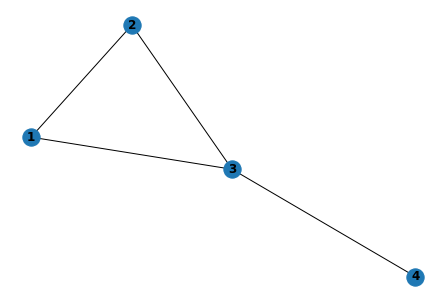

In [61]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4,5)])
print(list(G.nodes))
print(list(G.edges))
G.remove_node(5)
nx.draw(G, with_labels=True, font_weight='bold')

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

1. The ER network is a random graph. It is constructed by setting the number of nodes, _n_ to a fixed size, and then forming a connection for each pair of nodes, with probability _p_.
2. We'll create a ER network using .erdos_renyi_graph(n=100, p=0.01) from the NetworkX package. Thus, each node pair has a probability of 0.1 for connecting, and a 0.9 probability of not connecting.

The limit distribution 

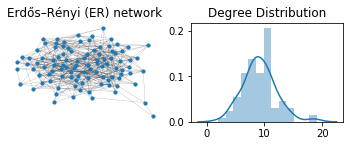

In [77]:
#5.1.2.2-3
ER = nx.erdos_renyi_graph(n=100, p=0.1, seed=10, directed=False)
plt.subplot(221)
plt.title('Erdős–Rényi (ER) network')
nx.draw(ER, node_size=10, width=0.1)
#5.1.2.4
#Find degrees and add to list
degrees = ER.degree()
degrees_ = []
for deg in degrees:
    degrees_.append(deg[1])
plt.subplot(222)
plt.title("Degree Distribution")
sns.distplot(degrees_, hist=True)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

The BA model falls into the class of scale-free networks. It is generated by starting adding nodes to a small starting network - thus as more nodes are added to the network, the probability that they form a connection the the existing nodes is proportional to the degree of each existing node.

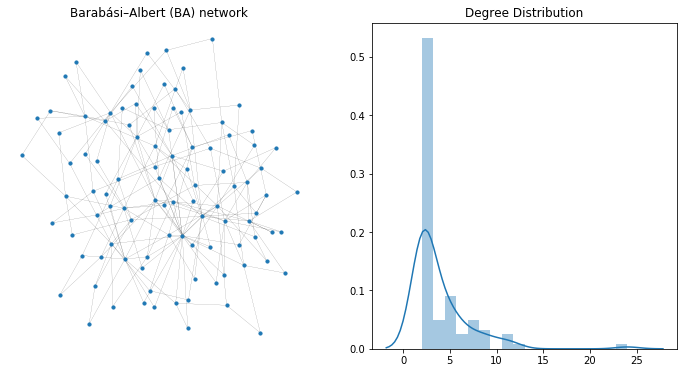

In [86]:
BA = nx.barabasi_albert_graph(100, 2, seed=10)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
nx.draw(BA, node_size=10, width = 0.1, ax=ax[0])
ax[0].set_title('Barabási–Albert (BA) network')

degrees = BA.degree()
degrees_ = []
for deg in degrees:
    degrees_.append(deg[1])
ax[1].set_title('Degree Distribution')
sns.distplot(degrees_, hist=True, ax=ax[1])


The degree distribution of the BA network shows that the majority of nodes have relatively low degrees, and a few nodes have a very high degree (hubs), as opposed to the ER network, where the degree distributions is random. This is a result of _preferential_ attachement, meaning that the more connected a node is, the more likely it is to receive new links.

Another relevant measure to describe the networks further could have been _clustering coefficients_

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [110]:
data = pd.read_csv(
    "facebook-wall.txt.gz",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [138]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [139]:
def get_slice(data, t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t
t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 365 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice
G_t = get_slice(data, t0, t1)

print('Nodes in network: %d  \nEdges in network: %d' % (len(G_t.nodes), len(G_t.edges)))

Nodes in network: 44397  
Edges in network: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [143]:
#Function to return degrees and counts:
def degree_dist(degrees):
    d_ = sorted([d for n, d in degrees])
    c_ = Counter(d_)
    d_, c_ = zip(*c_.items())
    return d_, c_

Text(0, 0.5, 'Density')

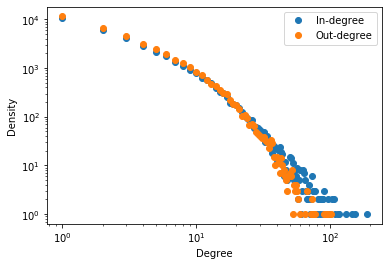

In [151]:

d_in, c_in = degree_dist(G_t.in_degree())
d_out, c_out = degree_dist(G_t.out_degree())

plt.plot(d_in, c_in, 'o', label='In-degree')
plt.plot(d_out, c_out, 'o',label='Out-degree')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Density')

The distribution of the facebook-wall network resembles the distribution of the Barabási–Albert network, with a few nodes being very connected (the hubs). 

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [163]:
import numpy as np

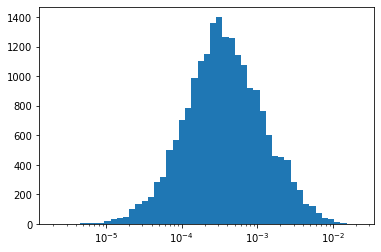

In [165]:
#Clusters:
clustering = nx.clustering(G_t, weight='weight')
#Remove 0 values
clustering = {key:val for key, val in clustering.items() if val != 0}
#Min and Max bounds
emin = sorted(set(clustering.values()))[0]
emax = sorted(set(clustering.values()))[-1]

#log bins using np.logspace
ebins = np.logspace(np.log10(emin), np.log10(emax))
plt.hist(clustering.values(), bins=ebins)
plt.xscale('log')

The distribution resembles a normal distribution.

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [188]:
#To get a network with around 5000 nodes and 20000 edges, use a smaller subset of the facebook-wall dataset  
t0 = data.timestamp.max() - 86400 * 90  # Lower bound of time-slice (here: 90 days before last wall post)
t1 = data.timestamp.max() 
G_vis = get_slice(data, t0, t1)

#Now the least interesting nodes are removed (i.e. the nodes with the lowest degrees) 
G_vis.remove_nodes_from(list(nx.isolates(G_vis)))
#Set starting threshold:
threshold = 1
while (len(G_vis.nodes()) >= 5250 or len(G_vis.edges()) >= 22000):
    remove_ = [node for node, degree in G_vis.degree() if degree < threshold]
    G_vis.remove_nodes_from(remove_)
    threshold += 1
    
print('Nodes in network: %d  \nEdges in network: %d' % (len(G_vis.nodes), len(G_vis.edges)))

Nodes in network: 3655  
Edges in network: 21948


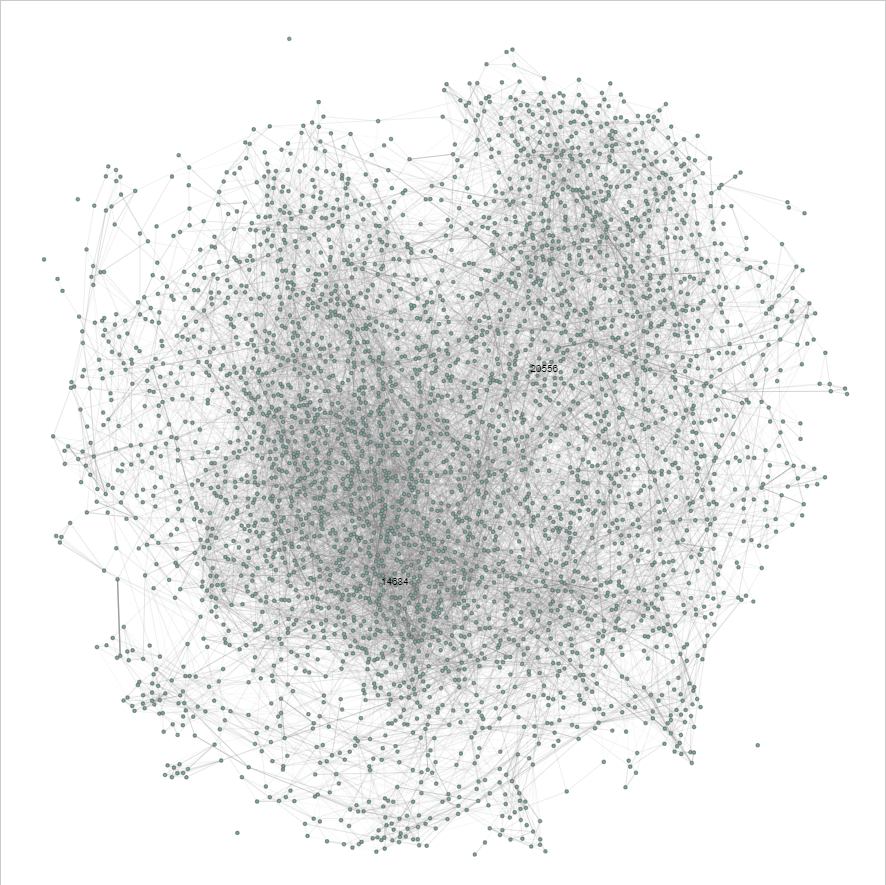

In [190]:
from IPython.display import Image
Image("network.png")